# 회귀 (Regression)
## 되돌아옴 --> 데이터셋의 수치들은 평균에 수렴할 것이다

* 가격, 매출, 주가, 환율, 수량 등 연속적인 값을 갖는 연속변수를 예측하는 데 사용
* 분석 모형이 예측하고자 하는 목표 : 종속(dependent) 또는 예측(목적)(predict) 변수
* 예측을 위해 모형이 사용하는 속성 : 독립(independent) 또는 설명(explainary) 변수

* ! 분류와 회귀 모두 예측의 범주에 해당함. 회귀만 예측이 아니다.

예를 들어 소득이 증가하면 소비도 증가
독립변수(소득)가 다른 변수(소비)에 영향을 줌

선형관계임을 발견하고, 다른 데이터가 들어왔을 때 어떤 값이 나올지 예측이 가능

* y = aX + b     
* a(직선의 기울기), b(절편)

a, b를 넣어보면서 손실함수를 최소화할 수 있는 인자를 찾아가는 과정을 최적화라고 한다.

## 선형회귀

In [1]:
import numpy as np
import matplotlib.pylab as plt

## 최적화(Optimization)

In [2]:
# 1차 (목적) 함수 - 손실함수, 비용함수, 오차함수

def f(x):
    return (x-2)**2+2

In [3]:
x1 = np.linspace(-1, 4, 100)
x1

array([-1.        , -0.94949495, -0.8989899 , -0.84848485, -0.7979798 ,
       -0.74747475, -0.6969697 , -0.64646465, -0.5959596 , -0.54545455,
       -0.49494949, -0.44444444, -0.39393939, -0.34343434, -0.29292929,
       -0.24242424, -0.19191919, -0.14141414, -0.09090909, -0.04040404,
        0.01010101,  0.06060606,  0.11111111,  0.16161616,  0.21212121,
        0.26262626,  0.31313131,  0.36363636,  0.41414141,  0.46464646,
        0.51515152,  0.56565657,  0.61616162,  0.66666667,  0.71717172,
        0.76767677,  0.81818182,  0.86868687,  0.91919192,  0.96969697,
        1.02020202,  1.07070707,  1.12121212,  1.17171717,  1.22222222,
        1.27272727,  1.32323232,  1.37373737,  1.42424242,  1.47474747,
        1.52525253,  1.57575758,  1.62626263,  1.67676768,  1.72727273,
        1.77777778,  1.82828283,  1.87878788,  1.92929293,  1.97979798,
        2.03030303,  2.08080808,  2.13131313,  2.18181818,  2.23232323,
        2.28282828,  2.33333333,  2.38383838,  2.43434343,  2.48

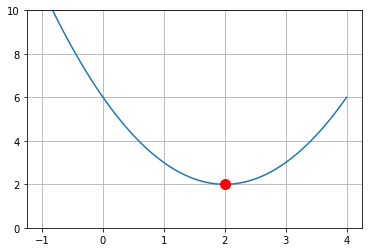

In [15]:
plt.plot(x1, f(x1))
plt.plot(2, 2, 'ro', ms=10)
plt.ylim(0,10)
plt.grid()
plt.show()

In [ ]:
'''
목적함수의 값을 가장 최소로 하는 x의 위치를 찾는 것 : 최적화
최적화 문제를 해결하는 가장 간단한 방법 : x 값을 다 넣어보고 그 중에서 가장 작은 값을 선택 ==> 그리드 서치 방법

# 그리드 서치의 단점 : 목적함수의 값을 찾기 위한 계산량이 너무 많아지게 됨.
                     이 단점을 해결하기 위한 방법이 수치적 최적화(Normal Optimization)
# 수치적 최적화 : 반복적 시행 착오 (Trial and Error)에 의해 최적화 필요조건을 만족하는 x*를 찾는 방법
               : 함수의 위치가 최저점이 될 때까지 가능한 적은 횟수로 x의 위치를 옮기는 방법이 필요
               
# 수치적 최적화를 수행하기 위한 알고리즘 요소
1) 어떤 위치 x를 시도한 다음에 다음 번에 시도할 위치 x를 찾는 알고리즘
2) 현재 위치 x가 최저점인지를 판단할 수 있는 알고리즘

# 기울기 필요 조건 : 모든 최소점은 기울기가 0이기 때문에, 최소점이 되려면 기울기 값이 0이어야 함.
                 : 기울기가 0이라고 해서 최소점은 아님. y축 상 중간 위치에 기울기가 0인 곡선 등의 형태가 존재할 수도 있기 때문.
# 기울기를 나타내는 함수(벡터)는 g 기호로 표기 - gradient

# 대표적 최적화 알고리즘
SGD(Stepest Gradient Descent)
'''

### 보스턴 주택 가격 예측 예제

In [4]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

In [7]:
# 데이터 로딩

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
'''
컬럼 설명 : 
CRIM : 지역별 범죄 발생율
ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율
INDUS : 비상업지역 넓이 비율
CHAS : 찰스강에 대한 더미 변수 (강의 경계에 있으면 1, 아니면 0)
NOX : 일산화질소 농도
RM : 거주할 수 있는 방의 개수
AGE : 1940년도 이전에 건축된 소유 주택의 비율
DIS : 5개 주요 고용센터까지의 가중 거리
RAD : 고속도로 접근 용이도
TAX : 10,000 달러당 재산세율
PTRATIO : 지역의 교사와 학생 수 비율
B : 지역 흑인 거주 비율
LSTAT : 하위 계층의 비율

'''

In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# Label을 추가
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


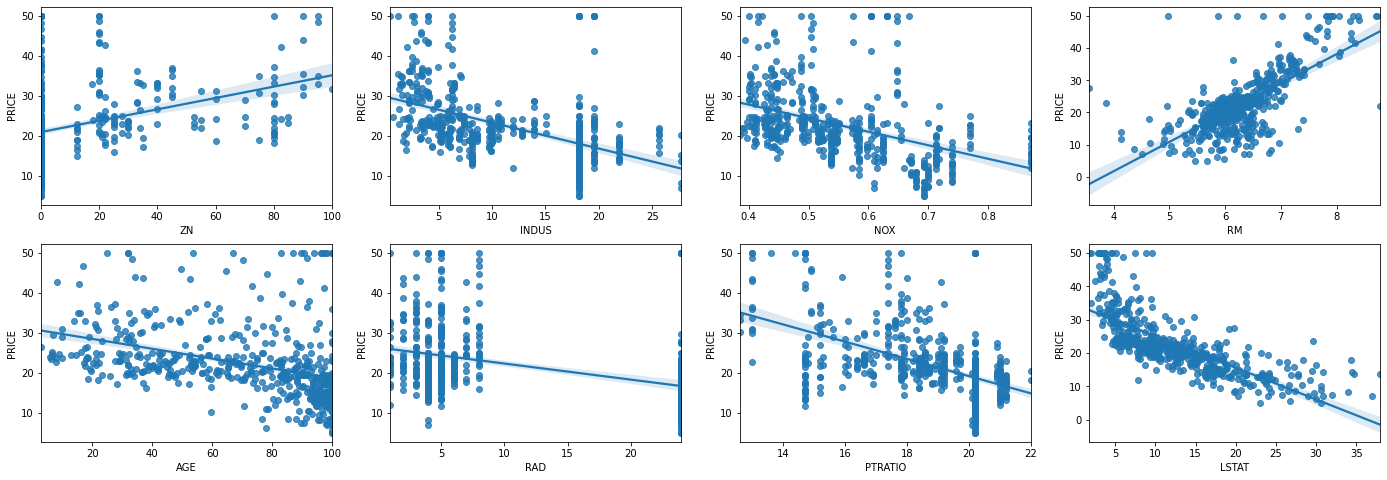

In [11]:
# 컬럼별로 주택 가격에 미치는 영향도를 시각화

fig, axs = plt.subplots(figsize=(24, 8), ncols=4, nrows=2)         #ncol, nrow - n개의 컬럼, n개의 row을 만드는 옵션
features = ['ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']

for i, feature in enumerate(features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

In [13]:
# 레이블 분리
y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis=1, inplace=False)

# 학습 데이터 / 테스트 데이터 분리 - 학습 / 예측 / 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [14]:
print(lr.predict(boston.data[5].reshape(1, -1)))
print('---------------------------------------')
print(boston.target[5])

[25.05459126]
---------------------------------------
28.7


In [16]:
# 모델이 선형회귀식 값
print('회귀 계수(기울기) : ', np.round(lr.coef_, 1))
print('-----------------------------------------------')
print('절편 : ', lr.intercept_)

회귀 계수(기울기) :  [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]
-----------------------------------------------
절편 :  39.29051011945228


In [18]:
# 성능 평가
# 결정 계수 (r2_score) : 추정한 선형 모형이 종속변수와 독립변수 사이의 상관관계를 나타낸 수치 (0~1 사이 값)
#                     : 1에 가까울수록 모형의 예측 능력이 좋다고 평가

print(lr.score(X_test, y_test))

0.7854511954574209


In [ ]:
'''
정확도 평가 : 
- 선형회귀는 잔차(실제값과 모델이 추정한 값의 차이)의 제곱합(SSE : Sum of Squares Error)를 최소화하는 방법으로 회귀 계수를 추정 
==> SSE가 작으면 작을수록 좋은 모델
- 이 SSE를 표준화한 개념 - MSE (Mean squared Error)
'''

In [19]:
# 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
vscore = r2_score(y_test, y_pred)

print('mse : ', np.round(mse, 3))
print('rmse : ', np.round(rmse, 3))
print('vscore : ', vscore)

mse :  18.14
rmse :  4.259
vscore :  0.7854511954574209


In [ ]:
'''
** 회귀 유형
- 일변량(Univariate) : 오직 하나의 양적 독립변수(설명변수)
- 다변량(Multivariate) : 두 개 이상의 양적 독립변수(설명변수)
- 단순(Simple) : 오직 하나의 종속 변수(반응변수)
- 다중(Multiple) : 두 개 이상의 종속변수(반응변수)
- 선형(Linear) : 데이터에 대하여 가능한 변환을 취한 후, 모든 계수들이 방정식에 선형적으로 삽입
- 비선형(Noelinear) : 종속변수와 일부 독립변수들의 관계가 비선형이거나 일부 계수들이 비선형으로 나타남
- 분산분석(ANOVA) : 모든 독립변수들이 질적변수.(수치가 아닌 카테고리 형태로 되어 있는 데이터들)
- 공분산분석(ANCOVA) : 어떤 독립변수들은 양적변수, 다른 독립변수들은 질적변수
- 로지스틱(Logistic) : 종속변수가 질적변수

** 대표적인 선형 회귀 모형
- 일반 선형 회귀                                 # 규제 : 과대적합이 되지 않도록 제한하는 것
- 릿지(Ridge) : 선형 회귀에 L2 Regularization(규제)를 추가한 모형 -- 영향력이 큰 데이터를 제외         
- 라소(Lasso) : 선형 회귀에 L1 Regularization(규제)를 추가한 모형 -- 영향력이 미비한 데이터를 제외
- 엘라스틱넷(ElasticNet) : L1, L2를 결합한 모형, 피처가 많은 데이터세트에 주로 사용
- 로지스틱(Logistic) : 상당히 많은 분야에서 사용됨 => 분류에 사용되는 특징이 있음
                    : 일반적인 이진 분류 뿐만 아니라 희소 영역의 분류(ex. 텍스트 분류와 같은 영역)에서
                      뛰어난 예측 성능을 보임
'''